# Data Split

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('practice.csv')
df.head()

,SB_D,SB_R,ERA,ER,CG,SHO,RA,R,AB,H,...,FP,SV,IPOuts,HA,HRA,BBA,SOA,E,DP,W
0,124,64,5.76,827,1,2,6.32,826,5109,1478,...,0.977,24,3878,1520,155,634,976,124,229,66
1,136,101,4.97,705,7,5,5.54,803,4999,1429,...,0.979,38,3828,1456,131,561,965,111,219,70
2,115,96,5.92,838,1,2,6.55,672,4963,1369,...,0.976,27,3819,1593,145,560,980,130,264,53
3,80,121,5.04,721,2,5,5.64,786,5051,1464,...,0.981,34,3863,1426,122,539,909,103,217,71
4,90,145,5.63,792,2,5,6.15,777,5001,1439,...,0.983,27,3799,1486,161,585,1009,91,229,66


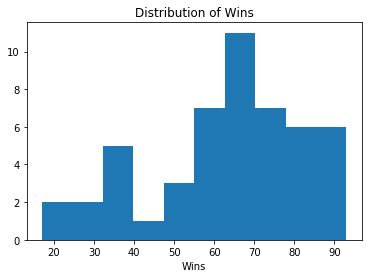

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [4]:
df.corr()['W']

SB_D      0.406149
SB_R      0.623423
ERA      -0.313221
ER        0.503294
CG        0.209995
SHO       0.473576
RA       -0.339742
R         0.876900
AB        0.838537
H         0.867653
2B        0.818614
3B        0.607394
HR        0.678608
BB        0.627698
SO        0.806856
Rank     -0.522707
G         0.828139
FP        0.109302
SV        0.922951
IPOuts    0.837875
HA        0.732641
HRA       0.491891
BBA       0.627698
SOA       0.806856
E         0.664863
DP        0.259039
W         1.000000
Name: W, dtype: float64

In [5]:
x_data = df.values[:, 0:26]
x_data

array([[124.  ,  64.  ,   5.76, ..., 976.  , 124.  , 229.  ],
       [136.  , 101.  ,   4.97, ..., 965.  , 111.  , 219.  ],
       [115.  ,  96.  ,   5.92, ..., 980.  , 130.  , 264.  ],
       ...,
       [ 82.  ,  44.  ,   5.46, ..., 447.  ,  46.  ,  53.  ],
       [ 34.  ,  81.  ,   4.61, ..., 401.  ,  43.  ,  57.  ],
       [ 54.  ,  65.  ,   4.37, ..., 425.  ,  47.  ,  62.  ]])

In [6]:
y_data = df.values[:, [26]]
y_data

array([[66.],
       [70.],
       [53.],
       [71.],
       [66.],
       [83.],
       [93.],
       [69.],
       [65.],
       [77.],
       [61.],
       [87.],
       [50.],
       [69.],
       [80.],
       [79.],
       [84.],
       [75.],
       [55.],
       [69.],
       [77.],
       [70.],
       [59.],
       [68.],
       [68.],
       [58.],
       [93.],
       [78.],
       [68.],
       [75.],
       [58.],
       [62.],
       [71.],
       [79.],
       [48.],
       [73.],
       [88.],
       [88.],
       [60.],
       [86.],
       [17.],
       [33.],
       [31.],
       [34.],
       [30.],
       [42.],
       [38.],
       [21.],
       [34.],
       [38.]])

# Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
x_data = scaler.fit_transform(x_data)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45, 26), (45, 1), (5, 26), (5, 1))

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)  # [0.39390555]
print("절편:", lr.intercept_)  # -0.03180434302675973
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[ -0.18236276   0.14671256   8.20986015 -18.69091666  -1.17798803
    0.67714682  -2.27818537  18.94768164   6.7835888  -13.71753123
    1.41563051  -2.14874987  -1.44882931   1.61061913  -2.10618722
   -3.74254544  15.82163502   0.96382358   5.75196783  -6.85763062
    8.25212526  -0.76920751   1.61061913  -2.10618722   2.74777861
   -1.52243656]]
절편: [63.21471165]
훈련 정확도:0.99039
테스트 정확도:0.92562
